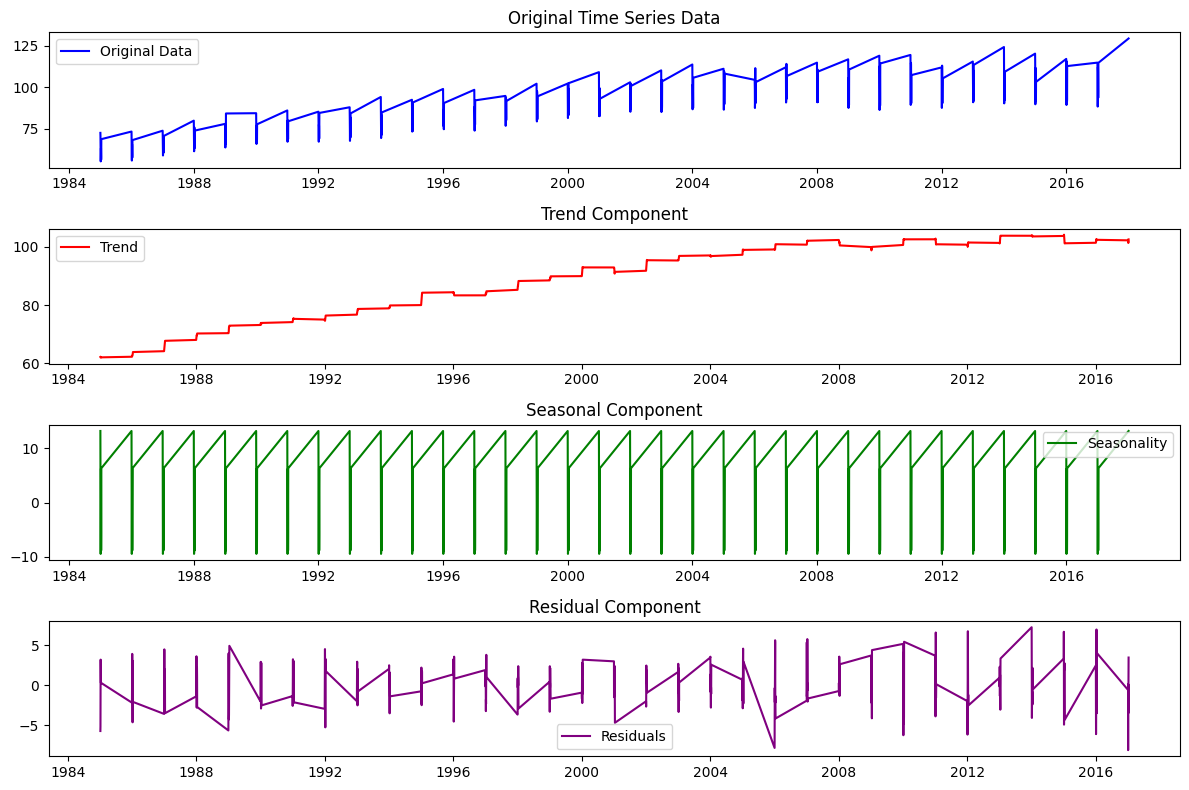

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the dataset
file_path = "Electric_Production.csv"  # Update path if needed
df = pd.read_csv(file_path)

# Convert DATE column to datetime and set as index
df['DATE'] = pd.to_datetime(df['DATE'], format='%d-%m-%Y')  # Adjusted to match DD-MM-YYYY format
df.set_index('DATE', inplace=True)

# Handle missing values
df.dropna(inplace=True)

# Perform Seasonal Decomposition
decomposed = seasonal_decompose(df['Value'], model='additive', period=12)  # Adjust period if needed

# Extract Components
df['Trend'] = decomposed.trend
df['Seasonality'] = decomposed.seasonal
df['Residuals'] = decomposed.resid

# Plot Decomposition
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(df['Value'], label="Original Data", color='blue')
plt.legend(loc='best')
plt.title("Original Time Series Data")

plt.subplot(4, 1, 2)
plt.plot(df['Trend'], label="Trend", color='red')
plt.legend(loc='best')
plt.title("Trend Component")

plt.subplot(4, 1, 3)
plt.plot(df['Seasonality'], label="Seasonality", color='green')
plt.legend(loc='best')
plt.title("Seasonal Component")

plt.subplot(4, 1, 4)
plt.plot(df['Residuals'], label="Residuals", color='purple')
plt.legend(loc='best')
plt.title("Residual Component")

plt.tight_layout()
plt.show()
